In [2]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

Import all the necessary library in the cell below

In [132]:
import numpy as np
from scipy.optimize import fsolve
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.integrate import quad
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


**Problem 1**

1- Load the titanic dataset from the seaborn package.

In [101]:
datas = sb.load_dataset("titanic")

2- how many columns in this dataset?

In [103]:
datas.shape[1]

15

3- list the names of all columns and describe the datatype of each column? 

In [104]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


4- Count the number of missing values in each column

In [108]:
datas.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

5- Clean the dataset by removing every record that contains a missing value? 

In [109]:
datas.drop(columns = ['deck'], inplace = True)
datas.dropna(axis = 0, inplace = True)

6 - Compute the average age of females and males who survived? 

In [119]:
datas.loc[(datas['sex'] == 'female')|(datas['sex'] == 'male') & (datas['survived'] == 1)].mean()[2]

27.62122159090909

6 - Count how many people survived by age and sex. Display the result as DataFrame. 

In [182]:
datas.groupby(by = ['sex', 'age']).sum()

survived  pclass  sibsp  parch      fare  adult_male  alone
sex    age                                                               
female 0.75          2       6      4      2   38.5166           0      0
       1.00          2       6      1      3   26.8750           0      0
       2.00          2      15      9      9  259.4750           0      0
       3.00          1       5      4      3   62.6542           0      0
       4.00          5      13      4      6  114.1417           0      0
...                ...     ...    ...    ...       ...         ...    ...
male   70.00         0       3      1      1   81.5000           2      1
       70.50         0       3      0      0    7.7500           1      1
       71.00         0       2      0      0   84.1584           2      2
       74.00         0       3      0      0    7.7750           1      1
       80.00         1       1      0      0   30.0000           1      1

[144 rows x 7 columns]

7- Build a logistic regression model using the pclass, age, parch, sex, and fare columns as explanatory variables and the survived column as response variable

In [173]:
X = datas[["pclass","age", "parch","sex","fare"]].values.reshape(-1,5)
y = datas["survived"].values.flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
classifier = LogisticRegression(random_state = 0, multi_class='auto')
# classifier.fit(X_train, y_train)

Object `male` not found.


8- Measure its performance using accuracy score and display the confusion matrix. 

9- Interpret the result

**Problem 2**

Let assume we have the one dimensional process model
\begin{equation}
x_i = \alpha x_{i-1}+\delta_i, \text{ with }\delta_i\thicksim \mathcal{N}(0,q^2),\;\; i = 1,\cdots,N ,
\end{equation}
and $x_0\thicksim \mathcal{N}(\mu,r^2)$. Assume the data model is 

\begin{equation}
y_i = h_i x_{i}+\epsilon_i, \text{ with }\epsilon_i\thicksim \mathcal{N}(0,s^2),\;\; i = 1,\cdots,N ,
\end{equation}
where
$$
h_i =\begin{cases}
 1, \;\;& i=&1,\cdots,N_1\\
0.1, & i=&N_1+1,\cdots, N_2\\
0.9, & i=&N_2+1,\cdots,N
\end{cases}.
$$
Note that $N_1<N_2<N$.

1- Write Python function called **Process** that takes $\alpha, N, q, \mu, r$ and return the array $x$ of the $x_i, i=0,\cdots,N$.

In [158]:
def Process(al, N, q,mu,r):
    x = np.zeros(N+1)
    x[0] = np.random.normal(mu,r)
    for i in range(1, N+1):
        delta = np.random.normal(0, q)
        x[i] = al*x[i-1] + delta
        
    return x


2- Write Python function called **Data** that takes array $x$ of the $x_i$, $s, N_1, N_2, N$ and return the array $y$ of $y_i,i=1,\cdots,N$

In [159]:
def Data(xi, s, N1,N2,N):
    for i in range(1,N+1):
        if i < N1:
            h = 1
        elif i<N2:
            h = 0.1
        else:
            h = 0.9
        Ei = np.random.normal(0,s)
        y = h*xi[1:] + Ei

    return y

3- Write a program to plot the data on the same graph as the process model, for \begin{equation}
r = 0.1, q=0.4, s=0.9, \mu = 0.01, \alpha = 0.8,N = 50,  N_1 = 20,  N_2 = 30
\end{equation}

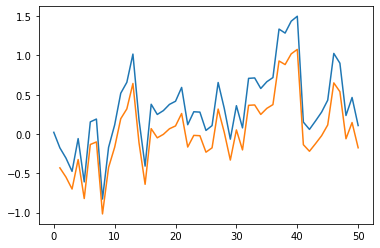

In [160]:
xi = Process(0.8,50,0.4,0.01,0.1)
y = Data(xi,0.9,20,30,50)

plt.plot(np.arange(0, len(xi)), xi)
plt.plot(np.arange(1, len(xi)), y)
plt.show()

4- Use the general formulas given for the Kalman filter to find the one dimensional formulas for

\begin{equation}
\mu_{1\mid 0}, \sigma_{1\mid 0}, k_1, \mu_{1\mid 1},\sigma_{1\mid 1},
\end{equation}
in term of $\alpha, q,r,s,\mu$ and $y_1$ (write the answer as markdown)

5- Using the general formulas given for the Kalman filter, write Python program to calculate
\begin{equation}
\mu_{i\mid i-1}, \sigma_{i\mid i-1}, k_i, \mu_{i\mid i},\sigma_{i\mid i},
\end{equation}
for $i=1,\cdots, N$. Be sure to
initialize the loop over $i$. Hint: I suggest using $\text{mu\_old}[i]$ for $\mu_{i\mid i-1}$, $\text{sigma\_old}[i]$ for $\sigma_{i\mid i-1}$, $\text{mu\_new}[i]$ for $\mu_{i\mid i}$, $\text{sigma\_new}[i]$ for $\sigma_{i\mid i}$

In [166]:
def mucal(al,N,q,r,h=1):
    mu_new=np.zeros(N)
    mu_old=np.zeros(N); 
    sigma_new=np.zeros(N); sigma_new[0] = 1
    sigma_old=np.zeros(N)
    K = np.zeros(N)
    for i in range(1, N):
        mu_old[i] = al*mu_new[i-1]
        sigma_old[i] = q + al*sigma_new[i-1]
        K[i] = sigma_old[i] * h * (h**2 * sigma_old[i] + r)**-1
        mu_new[i] = mu_old[i] + K[i]*(y[i]- h*mu_old[i])
        sigma_new[i] = (1 - K[i]*h) * sigma_old[i]
        
    return mu_new, mu_old, sigma_new, sigma_old
mu_new, mu_old, sigma_new, sigma_old = mucal(0.8,50,0.4,0.1)

6- Write a Python program to plot the states $x_i$ and data $y_i$ together with the filtered and forecasted estimates on the same graph.

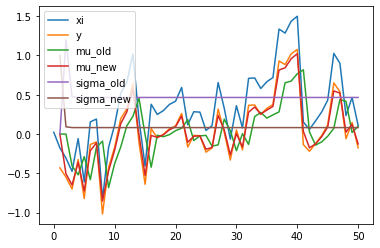

In [170]:
plt.plot(np.arange(0, len(xi)), xi, label = 'xi')
plt.plot(np.arange(1, len(xi)), y, label = 'y')
plt.plot(np.arange(1, len(xi)), mu_old,label = 'mu_old')
plt.plot(np.arange(1, len(xi)), mu_new, label = 'mu_new')
plt.plot(np.arange(1, len(xi)), sigma_old, label = 'sigma_old')
plt.plot(np.arange(1, len(xi)), sigma_new, label = 'sigma_new')
plt.legend()
plt.show()

**Problem 3**

1- Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_1<\cdots<x_{N-1}<x_N=b$ and $H$ be the length of the $k$-th subinterval ($H = x_k - x_{k-1}$),
then we have 
$$\int_a^bf(x)dx \approx \sum_{k=2}^N \frac{f(x_{k-1})+f(x_k)}{2}H = Z$$


Write a function named <b>Trap</b> that takes $a,b,N, f$ as inputs and return Z. Here, ``N = 50`` is the default value.

In [176]:
def Trap(a,b,f,N=50):
    x=np.linspace(a,b,N)
    Z=0
    H = (b-a)/N
    for i in range(2,N):
#         H = x[i]-x[i-1]
        Z += Z+H*(f(x[i-1])+f(x[i]))/2
    return Z

2- Let $m_k$  be the midpoint of the subinterval $[x_k,x_{k+1}]$ for all $k=1,\cdots,N-1$, we have 

$$\int_a^bf(x)dx \approx \sum_{m_k} f(m_{k})H = W$$

Write a function named <b>Mid</b> that takes $a,b,N, f$ as inputs and return W. Here, ``N = 50`` is the default value.

In [95]:
def Mid(a,b,f,N = 50):
    x=np.linspace(a,b,N)
    W=0
    H = (b-a)/N
    m = (x[1]+x[0])/2
    for i in range(2,N):
        m = (x[i]+x[i-1])/2
        W+=W+f(m)*H
    return W

3- Using **Trap, Mid** and python inbuilt function **Quad**, compute and display the integral 

$$A = \int_0^{\sqrt{\ln(2)}}xe^{x^2}dx$$

In [178]:
f = lambda x : x*np.exp(x**2)
Mid(0,np.sqrt(np.log(2)),f)
Trap(0,np.sqrt(np.log(2)),f)
quad(f,0,np.sqrt(np.log(2)))[0]

0.4999999999999998

4- After computing the exact value of $A$, write a Python program that searches for the minimun values $N_{Trap}, N_{Mid}$ less than 10000 such that **Trap, Mid**, respectively, give a better approximation of $A$ then **quad**.  If any the value  $ N_{Trap}, N_{Mid}$ doesn't exist your program should print the string **No $N_{Trap}$ found** or **No $N_{Mid}$ found**, respectively.

**Problem 4**

Let $\{ t_k\}$ be a partition of $[a,b]$ such that $a=t_0<t_1<\cdots<t_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = t_k - t_{k-1}$). Let us consider initial value problem

\begin{equation}\label{eul2}
  \begin{cases}
    \dfrac{dz}{dt} = f(z,t),      & \quad \text{on } [a, b]\\\\
    z(a) = c,
  \end{cases}
\end{equation}
where $z,f,c\in R^M$ i.e. $z = [x_1, x_2,\cdots, x_{M}]$, $c = [x_1(a), x_2(a),\cdots, x_{M}(a)]$ and $f = [f_1, f_2,\cdots, f_{M}]$. Note that \eqref{eul2} is a the general form of system of ODEs. 

Let $t, z_k,Z$ defined as follows $$t=[t_0,t_2,\cdots,t_{N-1},t_{N}],\quad z_k = [x_1(t_k), x_2(t_k),\cdots, x_{M}(t_k)], \quad
Z =\begin{pmatrix}
x_1(t_0)& x_2(t_0)&\cdots& x_{M}(t_0)\\
x_1(t_1)& x_2(t_1)&\cdots& x_{M}(t_1)\\
x_1(t_2)& x_2(t_2)&\cdots& x_{M}(t_2)\\
\vdots& \vdots&\ddots& \vdots\\
x_1(t_{N})& x_2(t_{N})&\cdots& x_{M}(t_{N})
\end{pmatrix}
$$

1. Write a python function <b> EulerOdeSys </b> that takes $f,c,t$ and return the solution $Z$ of the initial value problem \eqref{eul2} using Euler method i.e.
$$ z_{k+1} = z_k + Hf(z_k,t_k) $$


In [11]:
def EulerOdeSys(f,c,t):
    H = (t[1]-t[0]) 
    z = np.zeros((len(t),len(c)))
    z[0,:] = c
    for i in range(len(t)):
        for j in range(len(f)+1):
            z[i+1,j]= z[i,j] + H*f[j](z[i,:],t[i])
    return z

2. Write a python function <b> RalstonOdeSys </b> that takes $f,c,t$ and return the solution $Z$ of the initial value problem (1) using the Ralston method i.e.

\begin{equation}
\begin{cases}
k_1 = f(z_k,t_k),\\\\
k_2 = f(z_k+\dfrac{2}{3}Hk_1, t_k + \dfrac{2}{3}H),\\\\
z_{k+1} = z_k + H(\dfrac{1}{4}k_1+\dfrac{3}{4}k_2)
\end{cases}
\end{equation}


In [32]:
def  RalstonOdeSys(f,c,t):
    h = (t[1]-t[0]) 
    t = np.linspace(0,2,N+1)
    z=np.empty((len(t),len(f)))
    z[0,:] = c
    for i in range(len(t)):
        for j in range(len(f)):
            k_1 = f[j](z[i+1,j],t[i])
            k_2 = f[j](z[i+1,j]+h*(2*k_1/3),t[i]+(2*h)/2)
            z[i+1,j]=z[i,j]+h*((1/4)* k_1 + (3/4) * k_2)
    return z

**Problem 5**

Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<\cdots<x_{N-1}<x_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = x_k - x_{k-1}$). Let consider the second-order differential equation

\begin{equation}
  \begin{cases}
   \dfrac{d^2 y}{dx^2} + \dfrac{d y}{dx}-6y = 0 \qquad\forall x\in [a,b]\\\\
\dfrac{d y}{dx}(a)=0 , y(a) = 1
  \end{cases}
\end{equation}

Let $\{ y_k\}$ be the approximate solution i.e.  $y_k\approx g(x_k)=g_k$ where $g(x) = \dfrac{3}{5}e^{2x}+ \dfrac{2}{5}e^{-3x}$ is the exact solution. Let us denote $e_k = \mid g_k - y_k\mid$

1- Using the Python in-built function **odeint**, write a python function <b> SODE </b> that takes $a,b,N$ (with $N= 100$ as default value) and return array of all $x_k$, $y_k$, $g_k$ and $e_k$.


In [51]:
def func(z,x):
    y,v = z
    dydx = v
    dvdx = 6*y-v
    return np.array([dydx,dvdx])
def SODE(a,b,N=100):
    xi = np.array([1,0])
    x = np.linspace(a,b,N+1)
    z = odeint(func,xi,x)
    g = lambda x: (3/5)*np.exp(2*x) + (2/5) * np.exp(-3*x)
    e = abs(g(x)- z[:,0])
    return np.array([x,z[:,0],g(x),e])

2- Using **odeint**, solve the second-order differential equation for $a = 0, b = 2$ and use subplot to plot side by side
- $y_k$ and $g_k$ vs $x_k$
- $e_k$ vs $x_k$

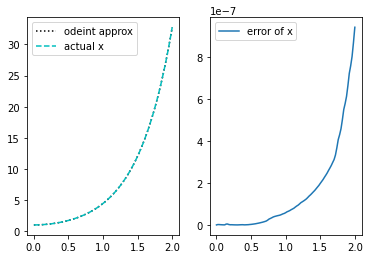

In [52]:
xk, yk, gk, ek = SODE(0,2)
fig, axs = plt.subplots(2, 2)
plt.subplot(1,2,1)
plt.plot(xk,yk, ':k',label="odeint approx")
plt.plot(xk,gk,'--c', label = "actual x")
plt.legend()

plt.subplot(1,2,2)
plt.plot(xk,ek, label="error of x")
plt.legend()

plt.show()

3- Using <b> RalstonOdeSys </b>, solve the second-order differential equation for $a = 0, b = 2$ and use subplot to plot side by side
- $y_k$ and $g_k$ vs $x_k$
- $e_k$ vs $x_k$

In [35]:
f = lambda x: [(3/5)*np.exp(2*x) + (2/5) * np.exp(-3*x)]
c = 1
t = np.linspace(0,2,100)
N = 100
z= RalstonOdeSys(f,c,t)
xk=u[:,0]
yk=u[:,1]
zk=u[:,2]

# fig, axs = plt.subplots(2, 2, figsize=(15, 15))
# plt.subplot(3,1,1)
# plt.plot(t,xk, ':k',label="R4 x")
# plt.legend()

# plt.subplot(3,1,2)
# plt.plot(t,yk,label="R4 y")

# plt.subplot(3,1,3)
# plt.plot(t,zk,label="R4 z")




# plt.show

TypeError: object of type 'function' has no len()

4- Using <b> EulerOdeSys </b>, solve the second-order differential equation for $a = 0, b = 2$ and use subplot to plot side by side
- $y_k$ and $g_k$ vs $x_k$
- $e_k$ vs $x_k$

5- The L2 error, $L2Er$ between the exact and the approximate solution given by

$$L2Er = \sum_0^N H(y_k - g_k)^2$$


Write a function called **L2_error** that takes $a,b,H$ and return the L2 error $g_k$ and the approximate solution $y_k$ obtained using **Odeint**, **RalstonOdeSys** and **EulerOdeSys**.

6- Let us denote $L2Er_j$ the output of **L2_error** for a given argument $a,b,H_j$. Using **Odeint**, **RalstonOdeSys** and **EulerOdeSys**, compute the array of $L2Er_j$ for $a = 0, b=2$ and $H_j$ in an array $L =[ 10^{-1}, 10^{-2}, 10^{-3}, 10^{-4}]$.

7- For each method **Odeint**, **RalstonOdeSys** and **EulerOdeSys**, plot in the same graph $log(L2Er_j)$ vs $log(H_j)$.

8.By assuming that $log(H_j)$ is the explanatory variable of $log(L2Er_j)$, complete the simple linear regression in the case of  **RalstonOdeSys**, **EulerOdeSys** and display the regression coeficient.

Note: Use the whole data to train your linear model.

**Problem 6**

1-The cost of admission to the world cup 2022 game is
- 320 USD for 3 children, 1 female  and 1 male 
- 600 USD  for 4 females and 2 males 
- 600 USD  for 5 children, 2 females and 2 males 

Transform the problem into a system of equation (as markdown in the cell below)

\begin{equation}
\begin{cases}
    3c + f + 1m = 320\\
    4f + 2m = 600\\
    5c + 2f + 2m = 600
\end{cases}
\end{equation}

c:Children
f:Female
m:Male

2- Write a Python code to compute and display how much is the admission for each child, female and male?

In [7]:
A=np.array([[3,1,1],[0,4,2],[5,2,2]])
b=np.array([320,600,600])
Z=np.linalg.inv(A)@b
print("children = ", Z[0], "Females = ", Z[1], "Male = ", Z[2])

children =  40.0 Females =  100.0 Male =  100.0


3- Using the Python in-built function fsolve with unitial guess $x=1, y=1$, write a Python code to solve the following system

\begin{equation}
\begin{cases}
    e^{x^2} + x = sin(y)\\
    2e^x + y = 3
\end{cases}
\end{equation}


In [13]:
def myFunction(z):
    x = z[0]
    y = z[1]
    F = np.empty((2))
    F[0] = np.exp(x**2)+x-np.sin(y)
    F[1] = 2*np.exp(x)+np.cos(y) - 2
    return F
zGuess = np.array([1,1])
z = fsolve(myFunction,zGuess)
print("x= ",z[0], "y= ",z[1])

x=  -0.3793915333122747 y=  -5.395803917749443
